# 📑 &nbsp; Deep Learning. PP 0_0: Image Classification
  <div class='navbar'>
    <a href='https://olgabelitskaya.gitlab.io/index.html'>&#x1F300; &nbsp; Homepage &nbsp; &nbsp;</a>
    <a href='https://olgabelitskaya.gitlab.io/deep_learning_projects/index.html'>
    &#x1F300; &nbsp; Project List &nbsp; &nbsp;</a>
    <a href='https://olgabelitskaya.gitlab.io/deep_learning_projects/DL_PP0_0_SMC.html'>
    &#x1F300; &nbsp; Main &nbsp; &nbsp;</a>
    <a href='https://olgabelitskaya.gitlab.io/deep_learning_projects/DL_PP1_0_SMC.html'>
    &#x1F300; &nbsp; Next &nbsp; &nbsp;</a><br/>
    <a href='https://olgabelitskaya.github.io/README.html'>&#x1F300; &nbsp; GitHub Pages &nbsp; &nbsp;</a>
    <a href='https://www.instagram.com/olga.belitskaya/'>&#x1F300; &nbsp; Instagram Posts &nbsp; &nbsp;</a>
    <a href='https://www.pinterest.ru/olga_belitskaya/code-style/'>&#x1F300; &nbsp; Pinterest Posts</a><br/>
  </div>

In this project, we'll classify images from the `Flower Color Images`
<a href='https://www.kaggle.com/olgabelitskaya/flower-color-images'> 
Kaggle Dataset</a>.<br/>
The content is very simple:<br/> 
photo images (128x128x3) with 20 species of flowering plants<br/>
stored in the file of `Hierarchical Data Format` 
<a href='https://raw.githubusercontent.com/OlgaBelitskaya/data_kitchen/main/Flowers128.h5'>Flowers128.h5</a>.<br/>
In the original dataset, the photo files are in the `.png` format and the labels are integers.<br/>
We'll preprocess the images, then train a neural network on all the samples.
<br/> 
We are going to apply 
<a href='https://keras.io/'>Keras: The Python Deep Learning library</a>.<br/>
At the end, we'll get to see the neural network's predictions on the sample images.<br/>
## ✒️ &nbsp;Step 0. Modules & Versions 

In [4]:
from IPython.display import display,HTML
import pandas as pd,numpy as np,tensorflow as tf
import h5py,urllib,random,PIL.Image
import warnings; warnings.filterwarnings('ignore')
import seaborn as sn,pylab as pl
import tensorflow.keras.callbacks as tkc,\
tensorflow.keras.layers as tkl
from tensorflow.keras import __version__
print('keras version:', __version__)
print('tensorflow version:', tf.__version__)

keras version: 2.4.0
tensorflow version: 2.4.1


## ✒️ &nbsp;Step 1. Loading and Exploring the Data 

In [5]:
file_path='https://raw.githubusercontent.com/'+\
          'OlgaBelitskaya/data_kitchen/main/'
file_name='Flowers128.h5'; cmap='autumn'
def h5py2data(file_path,file_name):
    input_file=urllib.request.urlopen(file_path+file_name)
    output_file=open(file_name,'wb'); 
    output_file.write(input_file.read())
    output_file.close(); input_file.close()
    with h5py.File(file_name,'r') as f:
        keys=list(f.keys())
        print('h5py.File keys: '+', '.join(keys))
        images=np.array(f[keys[0]])
        labels=np.array(f[keys[1]],dtype='float32')
        names=[el.decode('utf-8') for el in f[keys[2]]]
        f.close()
    return images,labels,names
images,labels,names=h5py2data(file_path,file_name)
num_classes=len(names); img_size=128

h5py.File keys: images, labels, names


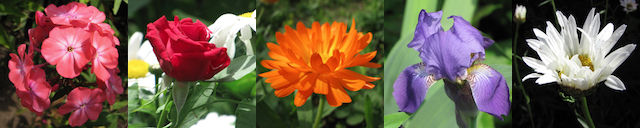

0,1,2,3,4
phlox,rose,calendula,iris,Shasta daisy
000.png,001.png,002.png,003.png,004.png


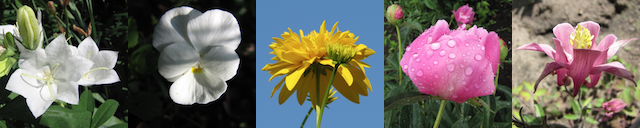

5,6,7,8,9
bellflower,viola,Goldquelle,peony,aquilegia
005.png,006.png,007.png,008.png,009.png


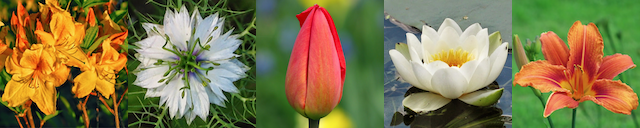

10,11,12,13,14
rhododendron,passiflora,tulip,water lily,lilium
010.png,011.png,012.png,013.png,014.png


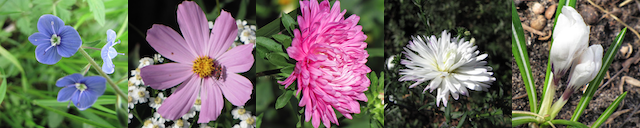

15,16,17,18,19
veronica chamaedrys,cosmos,aster annual,aster perennial,snowdrop
015.png,016.png,017.png,018.png,019.png


In [6]:
#@title Creating Examples of Image Files
def html_table(names,start,end):
    colors=['#FF355E','#FF6037','#FF9966','#FFCC33','#FFFF66',
            '#CCFF00','#66FF66','#50BFE6','#FF6EFF','#FF00CC']
    html_str="""<style>
    @import 'https://fonts.googleapis.com/css?family=Akronim|Lobster';
    .label_table  {width:50%; background-color:silver;
                   font-family:Lobster; font-size:120%; 
                   border:double slategray; text-align:center;}
    .label_table th  {font-size:150%; border:double slategray;}
    .label_table td  {min-width:117px; border:double slategray;}             
    </style><table class='label_table'><tr>"""
    for j in range(end-start):
        html_str+="""<td style='color:
        """+colors[j]+"""'>"""+str(start+j)+"""</td>"""
    html_str+="""</tr><tr>"""
    for j in range(end-start):
        html_str+="""<td style='color:
        """+colors[j]+""";'>"""+names[start+j]+"""</td>"""
    html_str+="""</tr><tr>"""
    for j in range(end-start):
        html_str+="""<td style='color:
        """+colors[j]+""";'>"""+'%03d'%(start+j)+'.png'+"""</td>"""       
    html_str+="""</tr></table>"""
    return HTML(html_str)
sample=np.unique(labels,return_index=True)[1]
imgs=images[sample]
for i in range(num_classes):
    pl.imsave('%03d'%i+'.png',np.array(255*imgs[i],dtype='uint8'))
pil_imgs=[[PIL.Image.open('%03d'%i+'.png') 
           for i in range(i*num_classes//4,(i+1)*num_classes//4)]
          for i in range(4)]
width=sum([img.size[0] for img in pil_imgs[0]])
height=max([img.size[1] for img in pil_imgs[0]])
for i in range(4):
    stacked=PIL.Image.new(pil_imgs[i][0].mode,(width,height))
    x_pos=0
    for img in pil_imgs[i]:
        stacked.paste(img,(x_pos,0)); x_pos+=img.size[0]
    display(stacked)
    display(html_table(names,5*i,5*(i+1)))

## ✒️ &nbsp;Step 2. CSV Saving and Reloading the Data

In [7]:
images_csv=np.array(255*images,dtype='uint8')\
           .reshape(len(labels),128*128*3)
np.savetxt('flower_images.csv',images_csv,
           fmt='%i',delimiter=',')
np.savetxt('flower_labels.csv',labels,
           fmt='%i',delimiter=',')
images=pd.read_csv('flower_images.csv',header=None)
labels=pd.read_csv('flower_labels.csv',header=None)
display(images.iloc[:10,:20])
display(labels.iloc[:20].T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,13,22,10,14,23,9,16,24,10,16,24,11,16,24,10,16,24,10,16,24
1,38,49,30,37,50,30,38,52,30,40,52,31,40,52,29,36,50,28,33,46
2,9,9,8,9,9,9,8,8,8,8,8,8,8,8,8,7,7,7,5,6
3,195,127,169,188,118,160,135,76,101,55,33,31,57,48,35,75,52,31,70,45
4,57,87,32,58,85,33,54,75,31,46,63,27,42,50,24,36,39,21,33,30
5,15,20,14,12,14,11,12,15,12,14,17,13,15,18,13,15,18,13,16,18
6,162,53,102,147,66,91,156,80,97,169,73,107,188,60,124,204,69,146,215,98
7,66,85,40,69,90,41,70,90,42,72,90,42,70,86,41,63,77,35,54,67
8,7,7,7,8,7,7,8,9,8,9,11,9,20,24,17,37,48,30,52,69
9,146,145,148,146,146,147,146,146,148,147,147,149,146,147,148,146,146,147,142,143


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


label: aster perennial


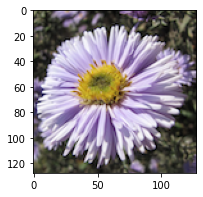

In [8]:
images=np.array(images.values/255,dtype='float32')\
.reshape(len(labels),img_size,img_size,3)
labels=np.array(np.squeeze(labels.values),dtype='float32')
n=np.random.randint(len(labels))
st='label: '+names[int(labels[n])]
print(st); pl.figure(figsize=(4,3))
pl.imshow((images[n])); pl.show()

## ✒️ &nbsp;Step 3. Implement Preprocess Functions

h5py.File keys: images, labels, names
data outputs: 



,train,valid,test
image shape,"(483, 128, 128, 3)","(60, 128, 128, 3)","(60, 128, 128, 3)"
image type,float32,float32,float32
label shape,"(483,)","(60,)","(60,)"
label type,float32,float32,float32


distribution of labels: 



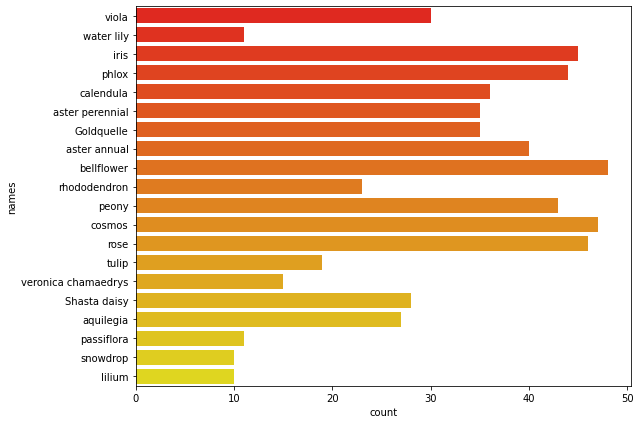

In [9]:
 def process_data(images,labels,names,cmap=cmap,
                  img_size=img_size,resize=False):
    N=images.shape[int(0)]; n=int(.1*N)
    if resize:
        images=tf.image.resize(images,[img_size,img_size]).numpy()
    shuffle_ids=np.arange(N)
    np.random.RandomState(12).shuffle(shuffle_ids)
    images=images[shuffle_ids]
    labels=labels[shuffle_ids] 
    x_test,x_valid,x_train=images[:n],images[n:2*n],images[2*n:]
    y_test,y_valid,y_train=labels[:n],labels[n:2*n],labels[2*n:]
    print('data outputs: \n')
    df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                     [x_train.dtype,x_valid.dtype,x_test.dtype],
                     [y_train.shape,y_valid.shape,y_test.shape],
                     [y_train.dtype,y_valid.dtype,y_test.dtype]],
                    columns=['train','valid','test'],
                    index=['image shape','image type',
                           'label shape','label type'])
    display(df)
    print('distribution of labels: \n')
    idx=['labels','names']
    df=pd.DataFrame([labels,[names[int(l)] for l in labels]],
                    index=idx).T
    fig=pl.figure(figsize=(9,6))    
    for i in range(labels.shape[int(0)]):
        ax=fig.add_subplot(1,1,1)
        sn.countplot(y='names',data=df,palette=cmap,alpha=.5,ax=ax)
    pl.tight_layout(); pl.show()       
    return [x_train,x_valid,x_test,y_train,y_valid,y_test]
images,labels,names=h5py2data(file_path,file_name)
[x_train,x_valid,x_test,y_train,y_valid,y_test]=\
process_data(images,labels,names)

label: Shasta daisy


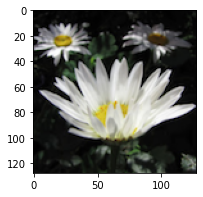

In [10]:
n=np.random.randint(len(x_train))
st='label: '+names[int(y_train[n])]
print(st); pl.figure(figsize=(4,3))
pl.imshow((x_train[n])); pl.show()

## ✒️ &nbsp;Step 4. Define the Model

In [11]:
def model(img_size=img_size,num_classes=num_classes):
    model=tf.keras.Sequential()
    model.add(tkl.Conv2D(
        32,(5,5),padding='same',input_shape=(img_size,img_size,3)))
    model.add(tkl.Activation('relu'))    
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.25))
    model.add(tkl.Conv2D(96,(5,5)))
    model.add(tkl.Activation('relu'))   
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.25))
    model.add(tkl.GlobalMaxPooling2D())
    model.add(tkl.Dense(1024,activation='tanh'))
    model.add(tkl.Dropout(.25))    
    model.add(tkl.Dense(64,activation='tanh'))
    model.add(tkl.Dropout(.25)) 
    model.add(tkl.Dense(num_classes))
    model.add(tkl.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])   
    return model
model=model()

## ✒️ &nbsp;Step 5. Train the Model

In [12]:
early_stopping=tkc.EarlyStopping(
    monitor='val_loss',patience=20,verbose=2)
checkpointer=tkc.ModelCheckpoint(
    filepath='/tmp/checkpoint',verbose=int(2),save_weights_only=True,
    monitor='val_accuracy',mode='max',save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',verbose=2,patience=7,factor=.8)
history=model.fit(x_train,y_train,epochs=100,batch_size=16,
                  verbose=2,validation_data=(x_valid,y_valid),
                  callbacks=[checkpointer,early_stopping,lr_reduction])

Epoch 1/100
31/31 - 34s - loss: 2.9046 - accuracy: 0.1180 - val_loss: 2.8387 - val_accuracy: 0.2333

Epoch 00001: val_accuracy improved from -inf to 0.23333, saving model to /tmp/checkpoint
Epoch 2/100
31/31 - 0s - loss: 2.5086 - accuracy: 0.2236 - val_loss: 2.5050 - val_accuracy: 0.2000

Epoch 00002: val_accuracy did not improve from 0.23333
Epoch 3/100
31/31 - 0s - loss: 2.1597 - accuracy: 0.3499 - val_loss: 2.9308 - val_accuracy: 0.0833

Epoch 00003: val_accuracy did not improve from 0.23333
Epoch 4/100
31/31 - 0s - loss: 1.9288 - accuracy: 0.3913 - val_loss: 2.2808 - val_accuracy: 0.2333

Epoch 00004: val_accuracy did not improve from 0.23333
Epoch 5/100
31/31 - 0s - loss: 1.8536 - accuracy: 0.4286 - val_loss: 2.0238 - val_accuracy: 0.2667

Epoch 00005: val_accuracy improved from 0.23333 to 0.26667, saving model to /tmp/checkpoint
Epoch 6/100
31/31 - 0s - loss: 1.6692 - accuracy: 0.4783 - val_loss: 1.9885 - val_accuracy: 0.2833

Epoch 00006: val_accuracy improved from 0.26667 to 0.

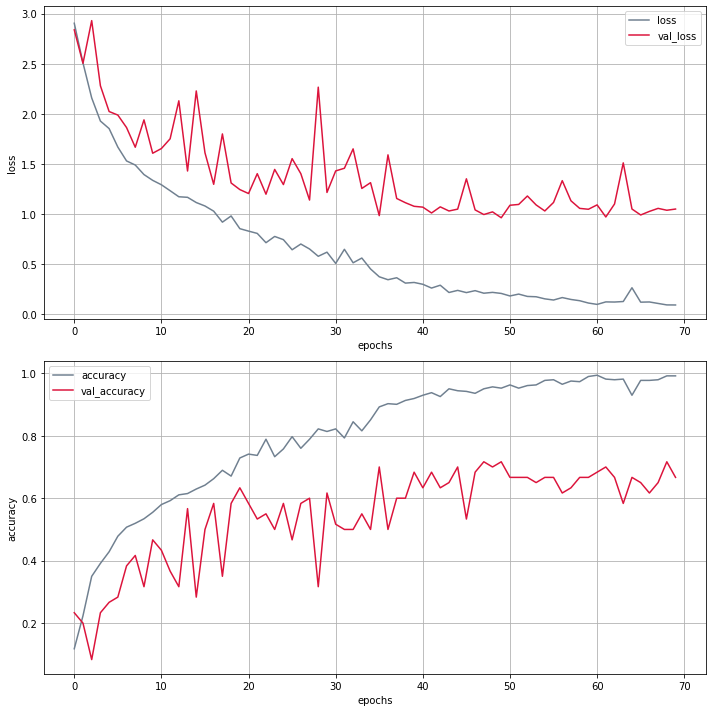

In [15]:
def history_plot(fit_history):
    pl.figure(figsize=(10,10))
    pl.subplot(211)
    keys=list(fit_history.history.keys())[0:4]
    pl.plot(fit_history.history[keys[0]],
            color='slategray',label=keys[0])
    pl.plot(fit_history.history[keys[2]],
            color='crimson',label=keys[2])
    pl.xlabel('epochs'); pl.ylabel(keys[0])
    pl.legend(); pl.grid(); pl.tight_layout()    
    pl.subplot(212)
    pl.plot(fit_history.history[keys[1]],
            color='slategray',label=keys[1])
    pl.plot(fit_history.history[keys[3]],
            color='crimson',label=keys[3])
    pl.xlabel('epochs'); pl.ylabel('accuracy')    
    pl.legend(); pl.grid(); pl.tight_layout(); pl.show()
history_plot(history)

## ✒️ &nbsp;Step 6. Evaluate and Save the Model

In [16]:
model.load_weights('/tmp/checkpoint')
#model.save('model.h5')
#model=load_model('model.h5')
model.evaluate(x_test,y_test,verbose=0)

[0.6286847591400146, 0.800000011920929]

## ✒️ &nbsp;Step 7. Display Predictions



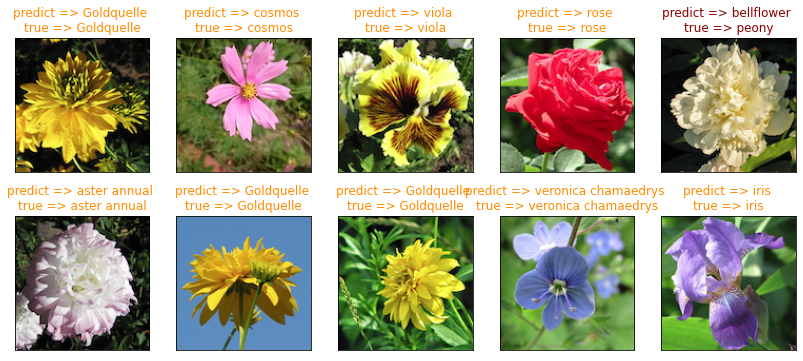

In [17]:
y_test_predict=model.predict_classes(x_test)
fig=pl.figure(figsize=(14,6))
randch=np.random.choice(x_test.shape[0],size=10,replace=False)
for i,idx in enumerate(randch):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=y_test_predict[idx]
    true_idx=int(y_test[idx])
    col=('darkorange' if pred_idx==true_idx else 'darkred')
    ax.set_title('predict => {} \ntrue => {}'\
    .format(names[pred_idx],names[true_idx]),color=col)
pl.show()

## ✒️ &nbsp; Step 8. Keras Applications

In [18]:
from keras.applications.vgg16 \
import VGG16,preprocess_input as prei16
from tensorflow.keras.models import Model
vgg16bmodel=VGG16(weights='imagenet',include_top=False)
from keras.applications.inception_v3 \
import InceptionV3,preprocess_input as iv3pi
iv3bmodel=InceptionV3(weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [19]:
pvx_train=vgg16bmodel.predict(x_train)
pvx_valid=vgg16bmodel.predict(x_valid)
pvx_test=vgg16bmodel.predict(x_test)
input_shape=pvx_train.shape[1:]

In [20]:
def vgg16model(input_shape=input_shape,num_classes=num_classes):
    model=tf.keras.Sequential()  
    model.add(tkl.GlobalAveragePooling2D(input_shape=input_shape))   
    model.add(tkl.Dense(512))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dropout(.5))        
    model.add(tkl.Dense(64))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dropout(.25))   
    model.add(tkl.Dense(num_classes,activation='softmax'))    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])
    return model
vgg16model=vgg16model()

In [21]:
early_stopping=tkc.EarlyStopping(
    monitor='val_loss',patience=20,verbose=2)
checkpointer=tkc.ModelCheckpoint(
    filepath='/tmp/checkpoint',verbose=int(2),save_weights_only=True,
    monitor='val_accuracy',mode='max',save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',verbose=2,patience=7,factor=.8)
history=vgg16model.fit(
    pvx_train,y_train, validation_data=(pvx_valid,y_valid), 
    epochs=800,batch_size=64,verbose=2, 
    callbacks=[checkpointer,lr_reduction,early_stopping])

Epoch 1/800
8/8 - 1s - loss: 3.0459 - accuracy: 0.0621 - val_loss: 2.9325 - val_accuracy: 0.0500

Epoch 00001: val_accuracy improved from -inf to 0.05000, saving model to /tmp/checkpoint
Epoch 2/800
8/8 - 0s - loss: 2.9011 - accuracy: 0.1118 - val_loss: 2.8659 - val_accuracy: 0.1167

Epoch 00002: val_accuracy improved from 0.05000 to 0.11667, saving model to /tmp/checkpoint
Epoch 3/800
8/8 - 0s - loss: 2.7546 - accuracy: 0.1677 - val_loss: 2.7345 - val_accuracy: 0.1833

Epoch 00003: val_accuracy improved from 0.11667 to 0.18333, saving model to /tmp/checkpoint
Epoch 4/800
8/8 - 0s - loss: 2.5740 - accuracy: 0.2112 - val_loss: 2.6414 - val_accuracy: 0.1833

Epoch 00004: val_accuracy did not improve from 0.18333
Epoch 5/800
8/8 - 0s - loss: 2.4354 - accuracy: 0.2857 - val_loss: 2.4363 - val_accuracy: 0.2833

Epoch 00005: val_accuracy improved from 0.18333 to 0.28333, saving model to /tmp/checkpoint
Epoch 6/800
8/8 - 0s - loss: 2.2992 - accuracy: 0.3313 - val_loss: 2.2422 - val_accuracy: 

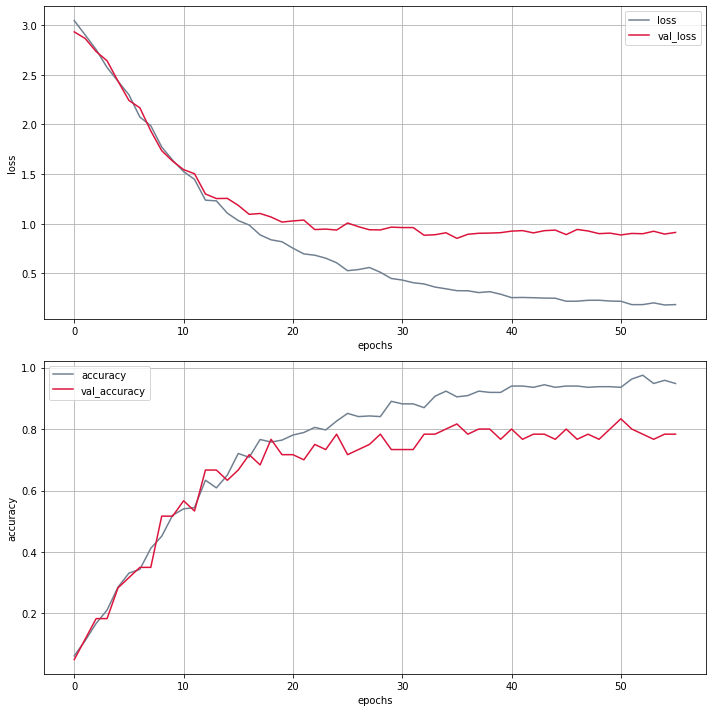

[0.5192030668258667, 0.8666666746139526]

In [22]:
history_plot(history)
vgg16model.load_weights('/tmp/checkpoint')
vgg16model.evaluate(pvx_test,y_test,verbose=0)

In [23]:
x=iv3bmodel.output
x=tkl.GlobalAveragePooling2D()(x)
x=tkl.Dense(512)(x)
x=tkl.LeakyReLU(alpha=.02)(x)
y=tkl.Dense(num_classes,activation='softmax')(x)
iv3model=Model(inputs=iv3bmodel.input,outputs=y)
for layer in iv3bmodel.layers:
    layer.trainable=False    
iv3model.compile(optimizer='nadam',metrics=['accuracy'],
                 loss='sparse_categorical_crossentropy')

In [24]:
batch_size=64; steps,epochs=len(x_train)//batch_size,30
generator=tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=.2,zoom_range=.2,horizontal_flip=True)
checkpointer=tkc.ModelCheckpoint(
    filepath='/tmp/checkpoint',verbose=int(2),save_weights_only=True,
    monitor='val_accuracy',mode='max',save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',verbose=2,patience=7,factor=.8)
history=iv3model.fit_generator(
    generator.flow(x_train,y_train,batch_size=batch_size), 
    steps_per_epoch=steps,epochs=epochs, 
    callbacks=[checkpointer,lr_reduction],
    validation_data=(x_valid,y_valid))

Epoch 1/30
7/7 [==============================] - 10s 838ms/step - loss: 4.4957 - accuracy: 0.1430 - val_loss: 2.6797 - val_accuracy: 0.3833

Epoch 00001: val_accuracy improved from -inf to 0.38333, saving model to /tmp/checkpoint
Epoch 2/30
7/7 [==============================] - 1s 209ms/step - loss: 1.8997 - accuracy: 0.4539 - val_loss: 1.7273 - val_accuracy: 0.4167

Epoch 00002: val_accuracy improved from 0.38333 to 0.41667, saving model to /tmp/checkpoint
Epoch 3/30
7/7 [==============================] - 2s 224ms/step - loss: 1.0818 - accuracy: 0.6706 - val_loss: 1.7824 - val_accuracy: 0.4333

Epoch 00003: val_accuracy improved from 0.41667 to 0.43333, saving model to /tmp/checkpoint
Epoch 4/30
7/7 [==============================] - 2s 232ms/step - loss: 0.8844 - accuracy: 0.7264 - val_loss: 1.5288 - val_accuracy: 0.5000

Epoch 00004: val_accuracy improved from 0.43333 to 0.50000, saving model to /tmp/checkpoint
Epoch 5/30
7/7 [==============================] - 2s 238ms/step - loss

In [25]:
for i,layer in enumerate(iv3bmodel.layers[173:]):
    print(i,layer.name)

0 batch_normalization_51
1 batch_normalization_56
2 activation_54
3 activation_59
4 conv2d_54
5 conv2d_59
6 batch_normalization_52
7 batch_normalization_57
8 activation_55
9 activation_60
10 average_pooling2d_5
11 conv2d_52
12 conv2d_55
13 conv2d_60
14 conv2d_61
15 batch_normalization_50
16 batch_normalization_53
17 batch_normalization_58
18 batch_normalization_59
19 activation_53
20 activation_56
21 activation_61
22 activation_62
23 mixed6
24 conv2d_66
25 batch_normalization_64
26 activation_67
27 conv2d_67
28 batch_normalization_65
29 activation_68
30 conv2d_63
31 conv2d_68
32 batch_normalization_61
33 batch_normalization_66
34 activation_64
35 activation_69
36 conv2d_64
37 conv2d_69
38 batch_normalization_62
39 batch_normalization_67
40 activation_65
41 activation_70
42 average_pooling2d_6
43 conv2d_62
44 conv2d_65
45 conv2d_70
46 conv2d_71
47 batch_normalization_60
48 batch_normalization_63
49 batch_normalization_68
50 batch_normalization_69
51 activation_63
52 activation_66
53 act

In [26]:
for layer in iv3model.layers[:173]:
    layer.trainable=False
for layer in iv3model.layers[173:]:
    layer.trainable=True
iv3model.compile(optimizer='adam',metrics=['accuracy'],
                 loss='sparse_categorical_crossentropy')
history=iv3model.fit_generator(
    generator.flow(x_train,y_train,batch_size=64), 
    steps_per_epoch=steps,epochs=epochs, 
    callbacks=[checkpointer,lr_reduction],
    validation_data=(x_valid,y_valid))

Epoch 1/30
7/7 [==============================] - 9s 548ms/step - loss: 2.2777 - accuracy: 0.3754 - val_loss: 13.7136 - val_accuracy: 0.2500

Epoch 00001: val_accuracy did not improve from 0.75000
Epoch 2/30
7/7 [==============================] - 2s 232ms/step - loss: 0.7028 - accuracy: 0.8199 - val_loss: 16.5810 - val_accuracy: 0.3667

Epoch 00002: val_accuracy did not improve from 0.75000
Epoch 3/30
7/7 [==============================] - 2s 225ms/step - loss: 0.2728 - accuracy: 0.9096 - val_loss: 17.4837 - val_accuracy: 0.3167

Epoch 00003: val_accuracy did not improve from 0.75000
Epoch 4/30
7/7 [==============================] - 2s 241ms/step - loss: 0.1406 - accuracy: 0.9650 - val_loss: 13.4553 - val_accuracy: 0.3000

Epoch 00004: val_accuracy did not improve from 0.75000
Epoch 5/30
7/7 [==============================] - 2s 241ms/step - loss: 0.1139 - accuracy: 0.9647 - val_loss: 16.0803 - val_accuracy: 0.4167

Epoch 00005: val_accuracy did not improve from 0.75000
Epoch 6/30
7/7 

In [27]:
iv3model.load_weights('/tmp/checkpoint')
scores=iv3model.evaluate(x_test,y_test)
print('accuracy: %.2f%%'%(scores[1]*100))

2/2 [==============================] - 0s 49ms/step - loss: 1.0486 - accuracy: 0.8167
accuracy: 81.67%


In [28]:
y_test_predict=iv3model.predict(x_test)
y_test_predict=[np.argmax(y_test_predict[i]) for i in range(len(y_test))]
y_test_predict=np.array(y_test_predict)

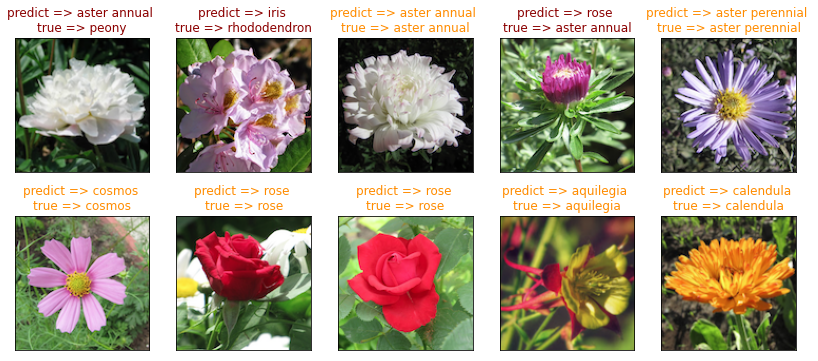

In [29]:
fig=pl.figure(figsize=(14,6))
randch=np.random.choice(x_test.shape[0],size=10,replace=False)
for i,idx in enumerate(randch):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=y_test_predict[idx]
    true_idx=int(y_test[idx])
    col=('darkorange' if pred_idx==true_idx else 'darkred')
    ax.set_title('predict => {} \ntrue => {}'\
    .format(names[pred_idx],names[true_idx]),color=col)
pl.show()